**Extra Graphs for Mini project**


In [567]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import joypy


# Specialized visualization
import waterfall_chart
from pandas.plotting import parallel_coordinates

# Statistical analysis
from scipy.stats import chi2_contingency, chi2

# Machine learning datasets
from sklearn.datasets import load_iris

# To remove warnings
import warnings
warnings.filterwarnings('ignore')

In [568]:
# READ IN THE DATA SET HERE
cleandata = pd.read_csv("cleandatav3.csv")
df = pd.DataFrame(cleandata)
df.head(15)



,Timestamp,"What class are you filling out this survey for? Check all that apply. If none of the listed options apply, select ""Other"" and enter your class name (for example, CS105).",What is your current class standing?,Are you a transfer student?,"What is your major/minor? (If your major is not listed, please write it in ""Other.."")",What is your current cumulative GPA?,What is your age? Answer with a number only.,What is your ethnicity?,What gender do you identify as?,Select ALL that you identify with:,...,What class(es) do you think prepared you most for the career field you want to pursue? DS courses,What class(es) do you think prepared you most for the career field you want to pursue? Humanities,Think about your time at UCR. Which week during the quarter do you: [Start feeling burnout],Think about your time at UCR. Which week during the quarter do you: [Have sleep deprivation],Think about your time at UCR. Which week during the quarter do you: [Start feeling less confident in the material],Think about your time at UCR. Which week during the quarter do you: [Start feeling more confident in the material],Think about your time at UCR. Which week during the quarter do you: [Study the most],Think about your time at UCR. Which week during the quarter do you: [Enjoy the most],Choose the resources that has been most helpful in your success in your favorite course. Choose all that apply.\n,"How confidently can you explain the following concepts to someone who hasn’t taken it? \n\n FOR CS MAJORS/MINORS: Pointers, if/else statements, for/while loops\n FOR DS MAJORS/MINORS: numpy, pandas, matplotlib, hypothesis testing"
0,2/1/2026 22:54:54,CS105,Senior,Yes,CSBA major,3.0 – 3.33,25,White,Male,First Generation Student,...,NaN,NaN,Week 5,Week 5,Week 4,Week 8,Week 8,Week 1,"Office hours, AI tools, Personal tutoring",3.0
1,2/1/2026 23:28:31,CS105,Senior,Yes,CS major,3.0 – 3.33,25,Hispanic or Latino,Female,First Generation Student,...,NaN,"ENGR180W, ENGR101",Week 7,Week 4,Week 6,Week 9,Week 9,Week 1,"Office hours, AI tools, Study groups, ULA serv...",8.0
2,2/1/2026 23:39:26,CS105,Senior,No,CS or DS minor,3.0 – 3.33,22,Hispanic or Latino,Male,First Generation Student,...,NaN,NaN,Week 4,Week 1,Week 4,Week 2,Week 9,Week 2,NaN,8.0
3,2/1/2026 23:44:50,CS111,Junior,Yes,CS major,3.67 – 4.0,21,Asian,Male,First Generation Student,...,NaN,NaN,Week 7,Week 5,Week 5,Week 1,Week 8,Week 1,"AI tools, ULA services",8.0
4,2/2/2026 0:30:27,CS111,Senior,No,CS major,3.33 – 3.67,19,Asian,Female,Second Generation Student,...,NaN,NaN,Week 7,Week 4,Week 3,Week 8,Week 5,Week 1,"Office hours, AI tools, Study groups, ULA serv...",10.0
5,2/2/2026 1:24:55,CS105,Junior,No,CS or DS minor,3.67 – 4.0,20,Asian,Female,First Generation Student,...,NaN,POSC196A,Week 4,Week 6,Week 3,Week 2,Week 8,Week 1,"Office hours, AI tools",7.0
6,2/2/2026 2:21:45,CS105,Senior,No,CS major,3.0 – 3.33,21,Asian,Male,Second Generation Student,...,NaN,NaN,Week 5,Week 8,Week 4,Week 2,Week 8,Week 1,"AI tools, Slack communication, Study groups",10.0
7,2/2/2026 4:54:15,CS105,Senior,No,CS major,3.67 – 4.0,20,"Asian, White",Male,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,2/2/2026 9:38:29,CS105,Junior,Yes,Data Science major,Prefer not to say,26,Hispanic or Latino,Male,First Generation Student,...,NaN,NaN,Week 5,Week 5,Week 6,Week 8,Week 4,Week 1,"Office hours, AI tools",7.0
9,2/2/2026 9:52:37,CS105,Senior,No,CS major,3.33 – 3.67,21,Prefer not to say,Female,First Generation Student,...,NaN,NaN,Week 6,Week 8,Week 3,Week 7,Week 9,Week 1,Study groups,9.0


Major and Gender by Proportion


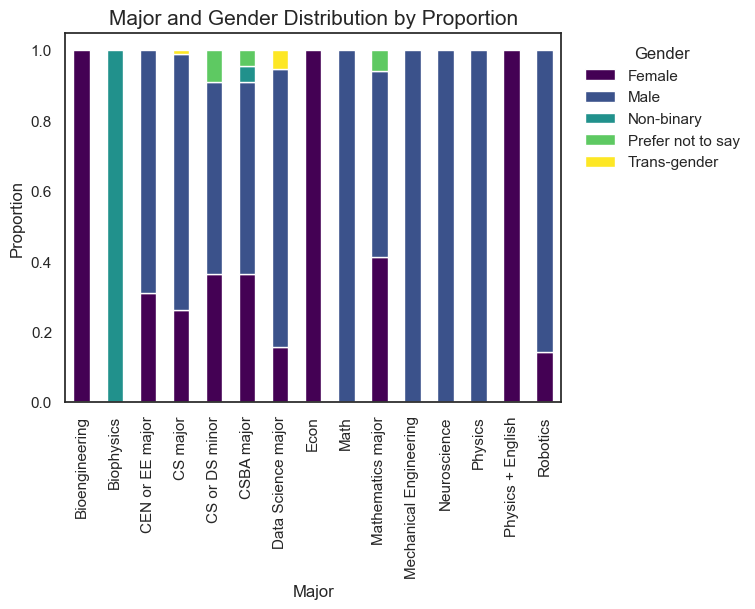

In [569]:
print("Major and Gender by Proportion")

major_col = 'What is your major/minor? (If your major is not listed, please write it in "Other..")'
gender_col = 'What gender do you identify as?'

cleandata["Major_clean"] = (cleandata[major_col].astype(str).str.strip())

major_lower = cleandata["Major_clean"].str.lower()

#combines Mechanical Engineering
mech_combine = major_lower.str.contains(r"\bmse\b|mechanical", na=False)
cleandata.loc[mech_combine, "Major_clean"] = "Mechanical Engineering"

#combines Robotics
robot_combine = major_lower.str.contains(r"robot", na=False)
cleandata.loc[robot_combine, "Major_clean"] = "Robotics"

major_gender_table = pd.crosstab(cleandata["Major_clean"], cleandata[gender_col])

major_gender_proportion = major_gender_table.div(major_gender_table.sum(axis=1), axis=0)
major_gender_proportion.plot(kind='bar', stacked=True, colormap="viridis")

plt.title('Major and Gender Distribution by Proportion', fontsize=15)
plt.ylabel('Proportion')
plt.xlabel('Major')
plt.legend(title="Gender", bbox_to_anchor=(1.02, 1), frameon=False)
plt.show()

Major and Identity Proportions


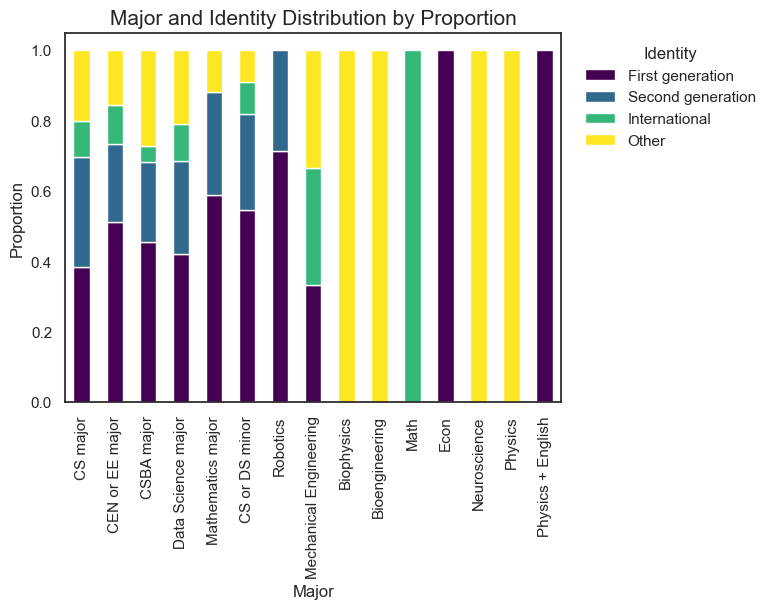

In [570]:
print("Major and Identity Proportions")

major_col = 'What is your major/minor? (If your major is not listed, please write it in "Other..")'
identity_col = 'Select ALL that you identify with:'

cleandata["Major_clean"] = cleandata[major_col].fillna("").astype(str).str.strip()
major_lower = cleandata["Major_clean"].str.lower()

#combines engineering majors
mech_combine = major_lower.str.contains(r"\bmse\b", regex=True, na=False) | major_lower.str.contains("mechanical", na=False)
cleandata.loc[mech_combine , "Major_clean"] = "Mechanical Engineering"

#combines robotics majors
robot_combine  = major_lower.str.contains("robot", na=False)
cleandata.loc[robot_combine , "Major_clean"] = "Robotics"

s = cleandata[identity_col].fillna("").astype(str).str.lower()

is_international = s.str.contains("international", na=False)
is_first = s.str.contains("first", na=False)
is_second = s.str.contains("second", na=False)

cleandata["Identity_group"] = np.select([is_international, is_first, is_second], ["International", "First generation", "Second generation"], default="Other")

identity_order = ["First generation", "Second generation", "International", "Other"]
cleandata["Identity_group"] = pd.Categorical(cleandata["Identity_group"], categories=identity_order, ordered=True)

major_identity_table = pd.crosstab(cleandata["Major_clean"], cleandata["Identity_group"])
major_identity_table = major_identity_table.reindex(columns=identity_order, fill_value=0)

major_identity_proportion = major_identity_table.div(major_identity_table.sum(axis=1), axis=0)
order_idx = major_identity_table.sum(axis=1).sort_values(ascending=False).index
major_identity_proportion = major_identity_proportion.loc[order_idx]
major_identity_proportion.plot(kind="bar", stacked=True, colormap="viridis")

plt.title('Major and Identity Distribution by Proportion', fontsize=15)
plt.ylabel('Proportion')
plt.xlabel('Major')
plt.legend(title="Identity", bbox_to_anchor=(1.02, 1), frameon=False)
plt.show()

Major and Identity Counts


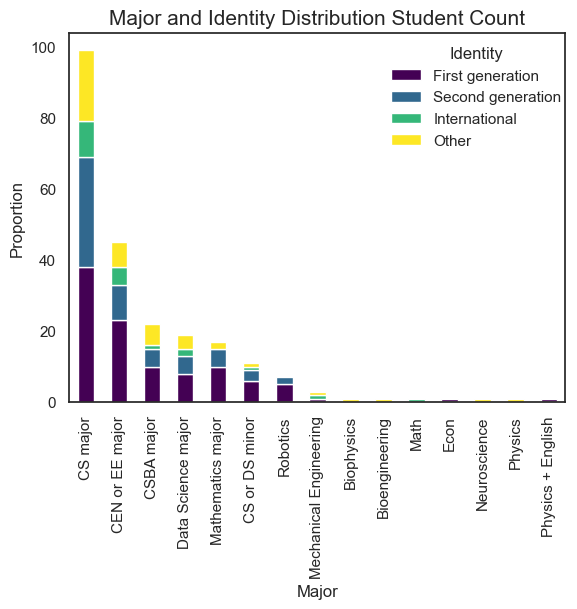

In [571]:
print("Major and Identity Counts")

major_col = 'What is your major/minor? (If your major is not listed, please write it in "Other..")'
identity_col = 'Select ALL that you identify with:'

cleandata["Major_clean"] = cleandata[major_col].fillna("").astype(str).str.strip()
major_lower = cleandata["Major_clean"].str.lower()

#combines engineering majors
mech_combine = major_lower.str.contains(r"\bmse\b", regex=True, na=False) | major_lower.str.contains("mechanical", na=False)
cleandata.loc[mech_combine , "Major_clean"] = "Mechanical Engineering"

#combines robotics majors
robot_combine  = major_lower.str.contains("robot", na=False)
cleandata.loc[robot_combine , "Major_clean"] = "Robotics"

s = cleandata[identity_col].fillna("").astype(str).str.lower()

is_international = s.str.contains("international", na=False)
is_first = s.str.contains("first", na=False)
is_second = s.str.contains("second", na=False)

cleandata["Identity_group"] = np.select([is_international, is_first, is_second], ["International", "First generation", "Second generation"], default="Other")

identity_order = ["First generation", "Second generation", "International", "Other"]
cleandata["Identity_group"] = pd.Categorical(cleandata["Identity_group"], categories=identity_order, ordered=True)

major_identity_table = pd.crosstab(cleandata["Major_clean"], cleandata["Identity_group"])
major_identity_table = major_identity_table.reindex(columns=identity_order, fill_value=0)

major_identity_table = major_identity_table.loc[major_identity_table.sum(axis=1).sort_values(ascending=False).index]
major_identity_table.plot(kind="bar", stacked=True, colormap="viridis")

plt.title('Major and Identity Distribution Student Count', fontsize=15)
plt.ylabel('Proportion')
plt.xlabel('Major')
plt.legend(title="Identity", bbox_to_anchor=(1.02, 1), frameon=False)
plt.show()

Burnout Week by Transfer Status


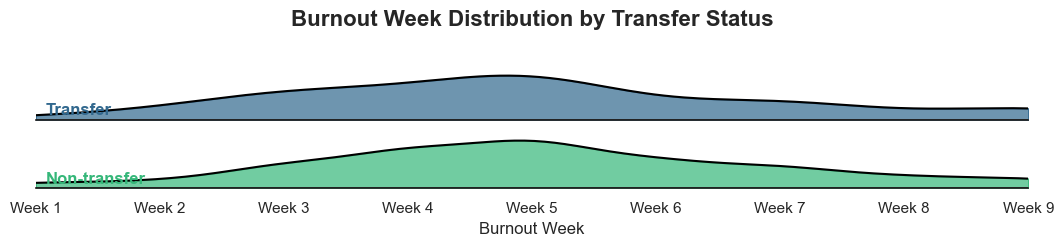

In [572]:
print("Burnout Week by Transfer Status")

transfer_col = "Are you a transfer student?"
burnout_col  = "Think about your time at UCR. Which week during the quarter do you: [Start feeling burnout]"

df["Burnout_Week"] = df[burnout_col].astype(str).str.extract(r"(\d+)").astype(float)

df[transfer_col] = df[transfer_col].astype(str).str.strip().str.lower()
df["Transfer_Status"] = df[transfer_col].replace({
    "yes": "Transfer",
    "no": "Non-transfer",
    "y": "Transfer",
    "n": "Non-transfer",
    "true": "Transfer",
    "false": "Non-transfer"
})

plot_df = df[["Transfer_Status", "Burnout_Week"]].dropna()

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(plot_df, row="Transfer_Status", hue="Transfer_Status", aspect=9, height=1.2, palette="viridis")
g.map(sns.kdeplot, "Burnout_Week", fill=True, alpha=0.7, bw_adjust=0.8, cut=0, clip=(1, 10))
g.map(sns.kdeplot, "Burnout_Week", color="black", linewidth=1.5, bw_adjust=0.8, cut=0, clip=(1, 10))
g.map(plt.axhline, y=0, linewidth=2, color="black")

def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0.01, 0.2, label,
        fontweight="bold",
        color=color,
        ha="left",
        va="center",
        transform=ax.transAxes,
        fontsize=12
    )

g.map(label, "Burnout_Week")

g.fig.suptitle(
    "Burnout Week Distribution by Transfer Status",
    fontsize=16,
    fontweight="bold",
    y=1.02
)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.set_xlabels("Burnout Week", fontsize=12)

for ax in g.axes.flat:
    ax.set_xlim(1, 9)
    ax.set_xticks(range(1, 10))
    ax.set_xticklabels([f"Week {w}" for w in range(1, 10)], rotation=0)

g.despine(left=True)
plt.tight_layout()
plt.show()


Burnout Week by Student Identity


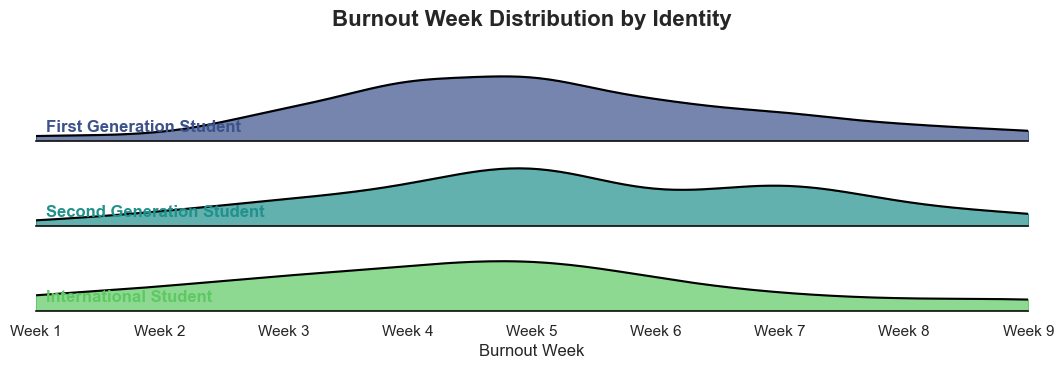

In [573]:
print("Burnout Week by Student Identity")
multi_col = "Select ALL that you identify with:"
burnout_col = "Think about your time at UCR. Which week during the quarter do you: [Start feeling burnout]"

df["Burnout_Week"] = df[burnout_col].astype(str).str.extract(r"(\d+)").astype(float)

s = df[multi_col].fillna("").astype(str).str.lower()

is_international = s.str.contains("international", regex=False)
is_first_gen     = s.str.contains("first generation", regex=False) | s.str.contains("first-generation", regex=False)
is_second_gen    = s.str.contains("second generation", regex=False) | s.str.contains("second-generation", regex=False)

df["Group"] = np.select([is_international, is_first_gen, is_second_gen], ["International Student", "First Generation Student", "Second Generation Student"], default=None)

plot_df = df[["Group", "Burnout_Week"]].dropna()

order = ["First Generation Student", "Second Generation Student", "International Student"]
plot_df["Group"] = pd.Categorical(plot_df["Group"], categories=order, ordered=True)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(plot_df, row="Group", hue="Group", aspect=9, height=1.2, palette="viridis")

g.map(sns.kdeplot, "Burnout_Week", fill=True, alpha=0.7, bw_adjust=0.8, cut=0, clip=(1, 9))
g.map(sns.kdeplot, "Burnout_Week", color="black", linewidth=1.5, bw_adjust=0.8, cut=0, clip=(1, 9))
g.map(plt.axhline, y=0, linewidth=2, color="black")

def label(x, color, label):
    ax = plt.gca()
    ax.text(0.01, 0.2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes, fontsize=12)

g.map(label, "Burnout_Week")

g.fig.suptitle("Burnout Week Distribution by Identity",
               fontsize=16, fontweight="bold", y=1.02)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.set_xlabels("Burnout Week", fontsize=12)

for ax in g.axes.flat:
    ax.set_xlim(1, 9)
    ax.set_xticks(range(1, 10))
    ax.set_xticklabels([f"Week {w}" for w in range(1, 10)])
g.despine(left=True)
plt.tight_layout()
plt.show()


Student Behavior Throughout Quarter


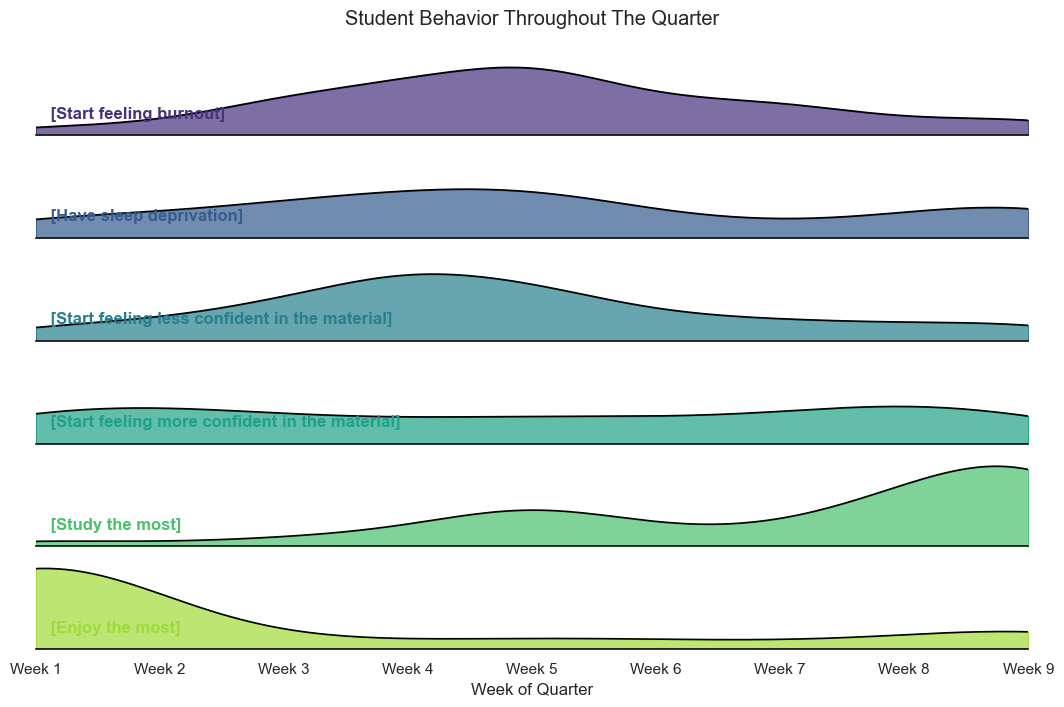

In [574]:
print("Student Behavior Throughout Quarter")
week_cols = [col for col in df.columns if "quarter" in col.lower()]

df_weeks = df[week_cols].copy()

for col in week_cols:
    df_weeks[col] = df_weeks[col].astype(str).str.extract(r"(\d+)").astype(float)

long = df_weeks.melt(var_name="Week_Variable", value_name="Week_Number").dropna()

long["Week_Variable"] = long["Week_Variable"].str.replace("Think about your time at UCR. Which week during the quarter do you: ", " ", regex=False)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(long, row="Week_Variable", hue="Week_Variable", aspect=9, height=1.2, palette="viridis")

g.map(sns.kdeplot, "Week_Number", fill=True, alpha=0.7, cut=0, clip=(1, 9))
g.map(sns.kdeplot, "Week_Number", color="black", linewidth=1.2)
g.map(plt.axhline, y=0, linewidth=2, color="black")

def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0.01, 0.2, label,
        fontweight="bold",
        color=color,
        transform=ax.transAxes
    )

g.map(label, "Week_Number")
g.set_titles("")
g.set_xlabels("Week of Quarter")
g.set(yticks=[], ylabel="")

for ax in g.axes.flat:
    ax.set_xlim(1, 9)
    ax.set_xticks(range(1, 10))
    ax.set_xticklabels([f"Week {w}" for w in range(1, 10)])

g.despine(left=True)
plt.suptitle("Student Behavior Throughout The Quarter")
plt.tight_layout()
plt.show()


In [ ]:
burnout_col = "Think about your time at UCR. Which week during the quarter do you: [Start feeling burnout]"
burnout_week = cleandata[burnout_col].astype(str).str.extract(r"(\d+)").astype(float)
counts = burnout_week.value_counts().sort_index()

peak_week = counts.idxmax()
print("Burnout per week:")
print(counts)


Burnout per week:
0  
1.0     6
2.0     9
3.0    30
4.0    42
5.0    59
6.0    27
7.0    26
8.0    11
9.0    14
Name: count, dtype: int64


In [ ]:
burnout_col = "Think about your time at UCR. Which week during the quarter do you: [Start feeling burnout]"
sleep_col = "Think about your time at UCR. Which week during the quarter do you: [Have sleep deprivation]"

burnout_week = cleandata[burnout_col].astype(str).str.extract(r"(\d+)").astype(float)
sleep_week = cleandata[sleep_col].astype(str).str.extract(r"(\d+)").astype(float)

df_compare = pd.concat([burnout_week, sleep_week], axis=1)
df_compare.columns = ["Burnout", "Sleep"]
df_compare = df_compare.dropna()

corr_value = df_compare["Burnout"].corr(df_compare["Sleep"])
print("Pearson correlation:", corr_value)

Pearson correlation: 0.4058064086140493
